___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.drop(["CustomerID"], axis=1, inplace=True)
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

In [4]:
df.columns = ['Gender', 'Age', 'Annual_Income', 'Spending_Score']
df.head()

Gender  Age  Annual_Income  Spending_Score
0    Male   19             15              39
1    Male   21             15              81
2  Female   20             16               6
3  Female   23             16              77
4  Female   31             17              40

**Second way to rename the columns**

df.rename(columns={'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'}, inplace=True)
df.head() 

In [5]:
df.Gender.replace(["Male", "Female"], [0,1], inplace = True)
df.head()

Gender  Age  Annual_Income  Spending_Score
0       0   19             15              39
1       0   21             15              81
2       1   20             16               6
3       1   23             16              77
4       1   31             17              40

**Change the categorical column to numeric**

*first way : df = pd.get_dummies(df,drop_first=True) 

*make the gender column to numeric

*all algorithms work with numeric values so all columns should consist of numeric values

*second way : from sklearn.preprocessing import LabelEncoder

*le = LabelEncoder()

*df["Gender"] = le.fit_transform(df["Gender"])

*df.head()

*male 1 female 0 

*third way : df.Gender.replace(["Male", "Female"], [0,1], inplace = True)


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [6]:
df.shape

(200, 4)

In [7]:
df.describe().T

count   mean        std   min    25%   50%   75%    max
Gender          200.0   0.56   0.497633   0.0   0.00   1.0   1.0    1.0
Age             200.0  38.85  13.969007  18.0  28.75  36.0  49.0   70.0
Annual_Income   200.0  60.56  26.264721  15.0  41.50  61.5  78.0  137.0
Spending_Score  200.0  50.20  25.823522   1.0  34.75  50.0  73.0   99.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual_Income   200 non-null    int64
 3   Spending_Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [9]:
df.isnull().sum().any()

False

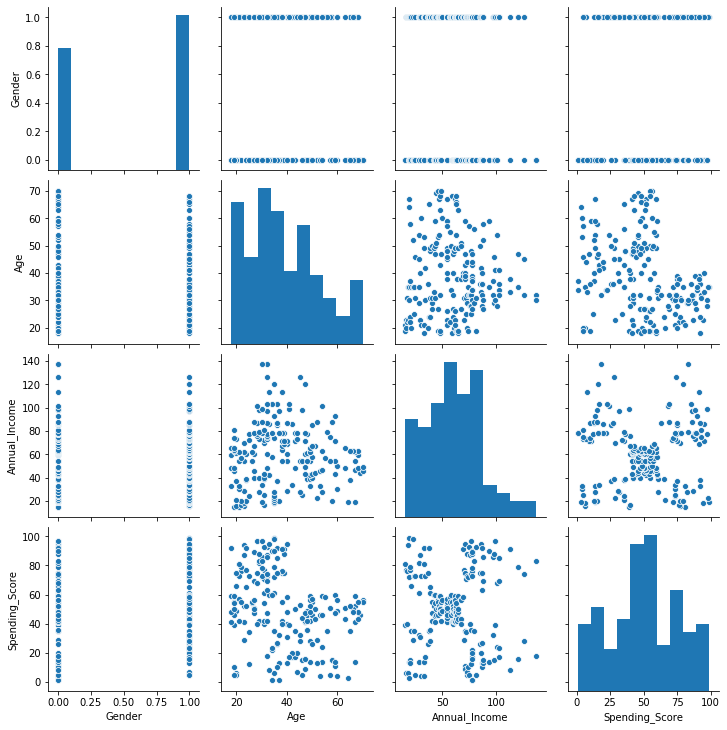

In [10]:
sns.pairplot(df)

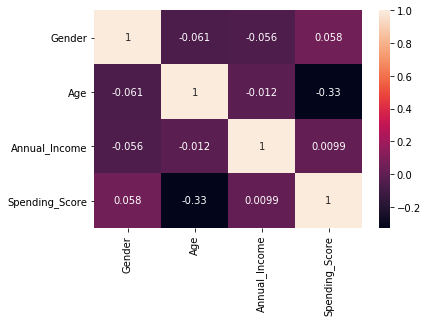

In [11]:
sns.heatmap(df.corr(), annot=True)

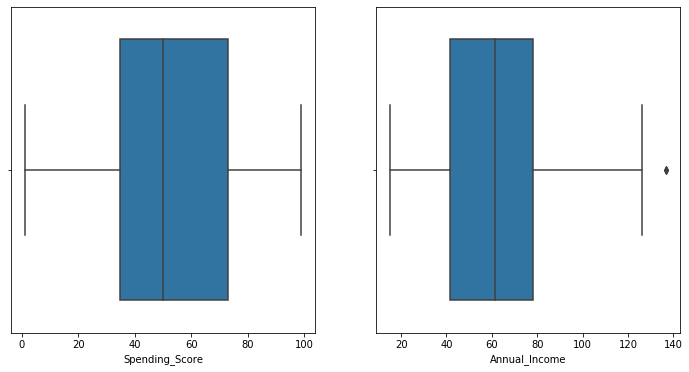

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(df["Spending_Score"])
plt.subplot(1,2,2)
sns.boxplot(df["Annual_Income"])
plt.show()

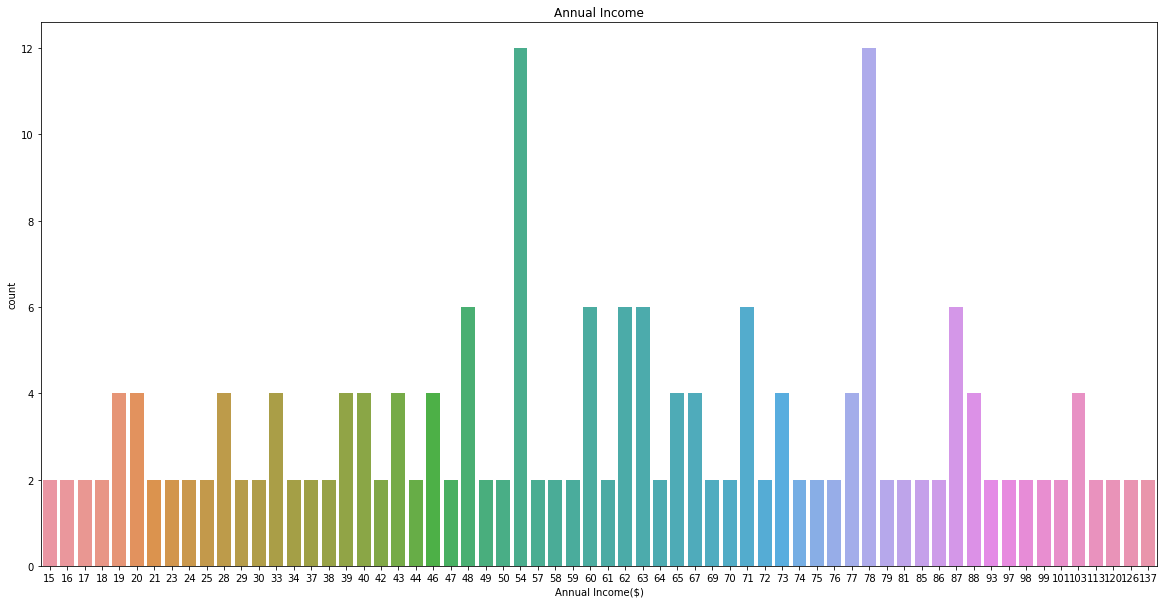

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(df['Annual_Income'])
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
plt.show()

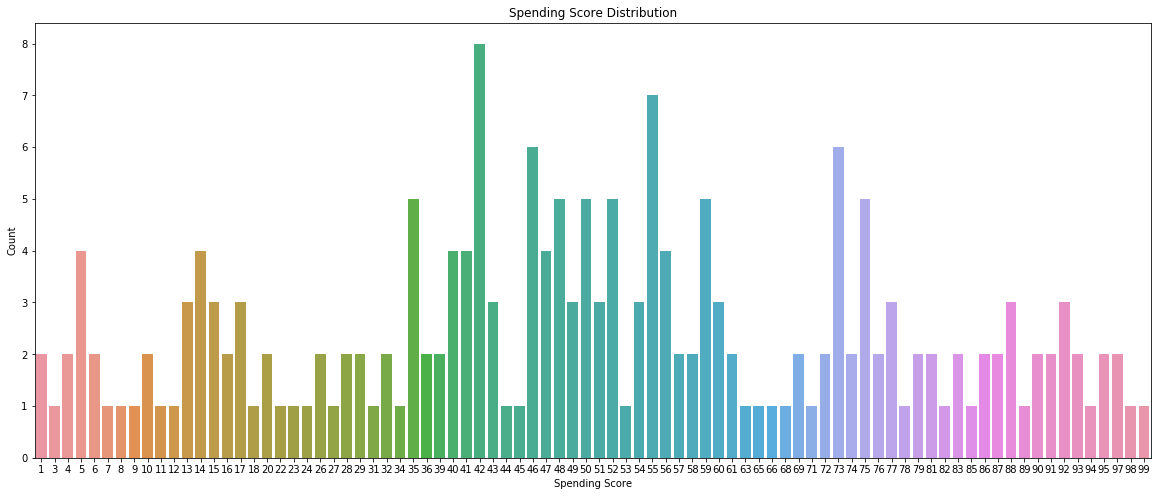

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(df['Spending_Score'])
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.axis()
plt.show()

Text(0, 0.5, 'Count')

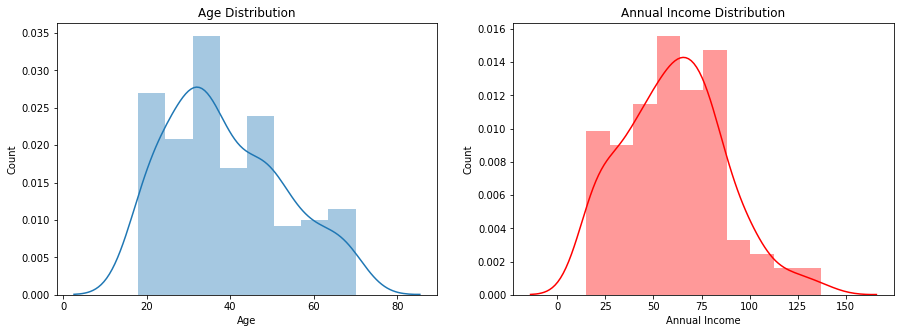

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(df['Annual_Income'],color='red')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

(-1.25, 1.25, -1.25, 1.25)

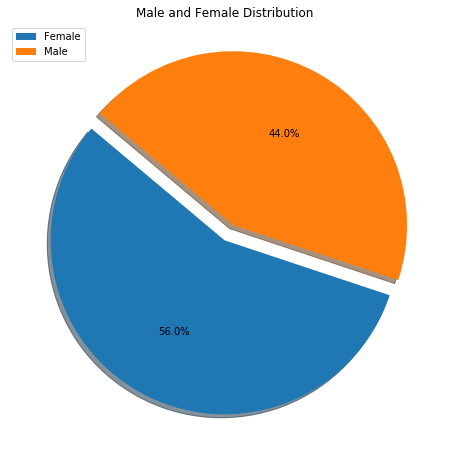

In [16]:
plt.figure(figsize=(8,8))
explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

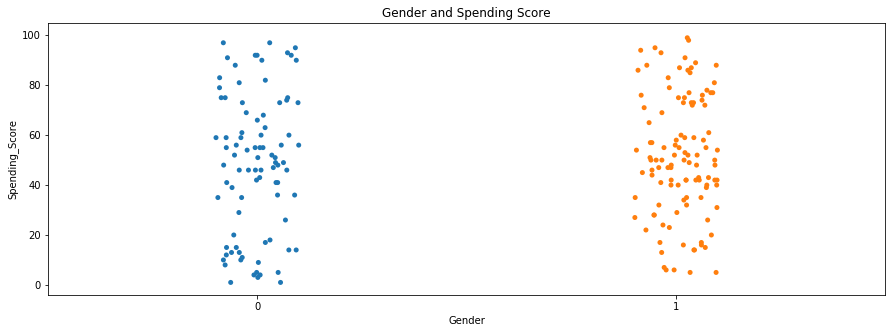

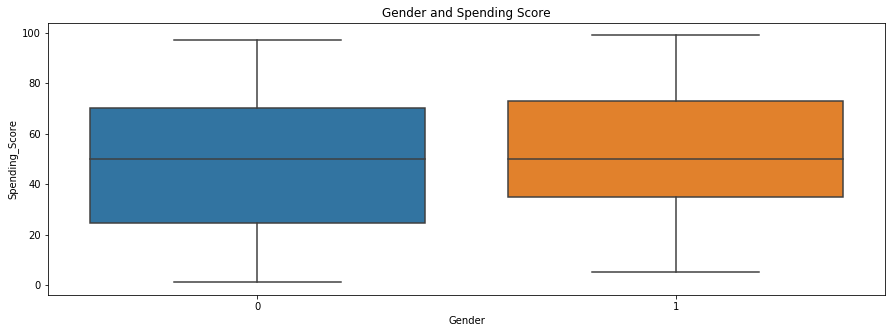

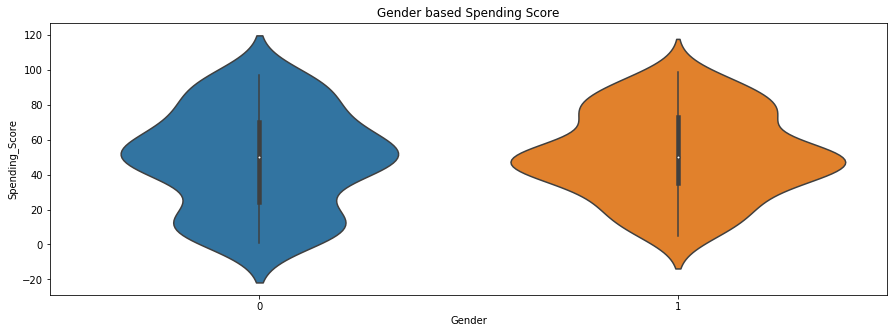

In [17]:
plt.figure(figsize=(15,5))
sns.stripplot(df['Gender'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(df['Gender'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()
plt.figure(figsize=(15,5))
sns.violinplot(df['Gender'],df['Spending_Score'])
plt.title('Gender based Spending Score')
plt.show()

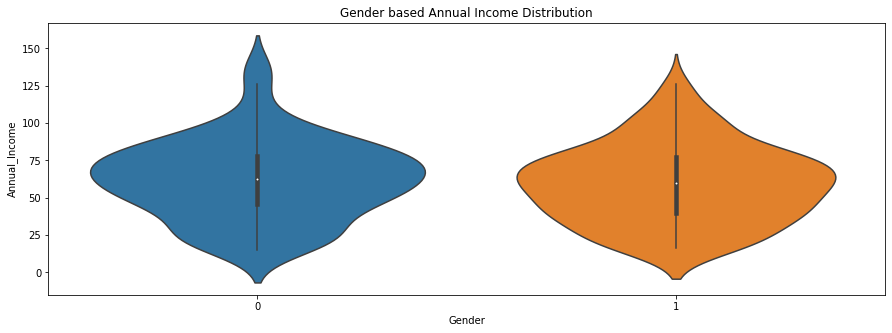

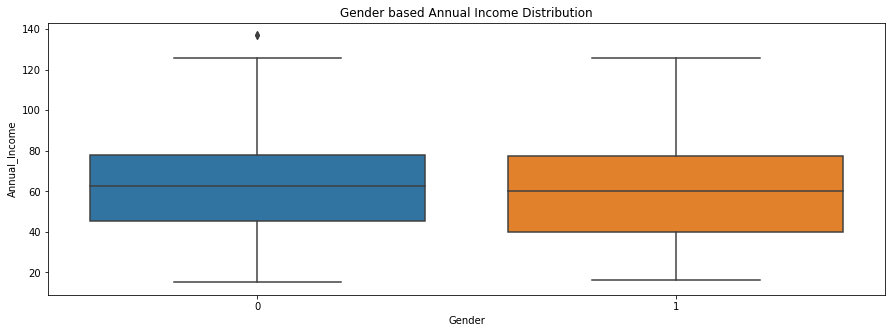

In [18]:
plt.figure(figsize=(15,5))
sns.violinplot(df['Gender'],df['Annual_Income'])
plt.title('Gender based Annual Income Distribution')
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(df['Gender'],df['Annual_Income'])
plt.title('Gender based Annual Income Distribution')
plt.show()

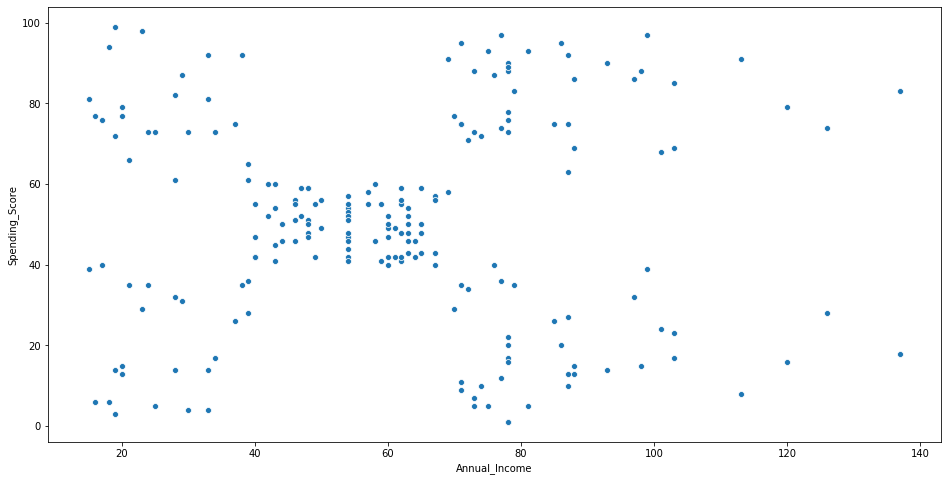

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(df['Annual_Income'], df['Spending_Score'], ax=ax)
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

**Hopkins test  -- the hopkins test helps to decide whether to do it or not.**
**close to zero.**

**Hopkins Test**
* Zaman ve maliyet verimliliği için, İlk olarak Veride kümeleme eğilimi var mi yok mu belirlemek için ``Hopkins Testi`` yapılır.
* Null Hypothesis(Ho) ve Alternative Hypothesis(Ha) temeline dayaniyor.
* Null Hypothesis(Ho): Uniform dagilim var, anlamli kümeleme yok.
* Alternative Hypothesis(Ha):  Veri, ratsgele veri noktalarindan oluşur. Yani Kumeleme vardir.
* [0,1] araliginda bir score verir. score, 0’a yaklaştıkça veri uniform degil,yani clusteringe meyilli
* 1’e yaklaştıkça uniform yapi var, 0.5 gecmedikce kümelenebilir olarak ifade edilir. pratikte 0.3 sinir alinir.

In [20]:
from pyclustertend import hopkins

In [21]:
hopkins(df,df.shape[0]) 

0.32498177154360974

In [22]:
from sklearn.preprocessing import scale

In [23]:
hopkins(scale(df),df.shape[0]) 

0.26315425637604084

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [24]:
x1 = df.iloc[: , [1,3]]
x1.head()

Age  Spending_Score
0   19              39
1   21              81
2   20               6
3   23              77
4   31              40

In [25]:
hopkins(x1,x1.shape[0])

0.29221979327326847

#### *ii. Determine optimal number of clusters*

**Elbow Method**
* aciklanan varyans(Sum of squared distances) ve küme sayisi(k) arasindaki ilişkiye dayanarak cozum geliştiren bir yöntem,
* yani aciklanan varyans, küme sayisinin fonksiyonu olarak çizilir, grafikte dirseğin kirildigi nokta, k nin optimal degeridir
* minimum k ile minimum hatanin alindigi optimum noktayi baz alacagiz. Keskin dususun en son bittigi yeri alacagiz.

**ELBOW METHOD**

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

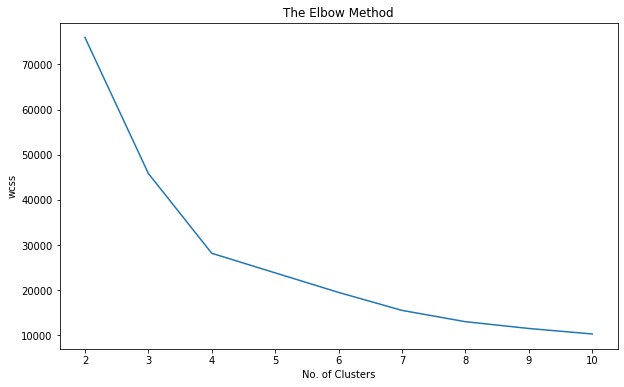

In [27]:
wcss =[]

for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

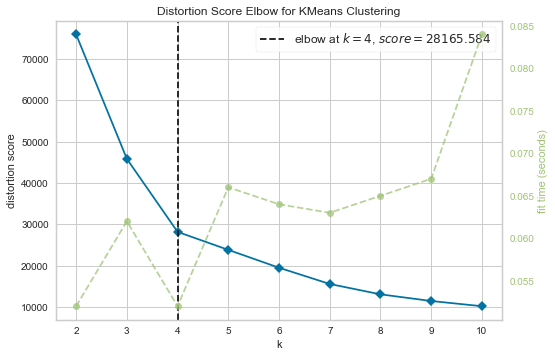

In [28]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,11))
visu.fit(x1)
visu.poof();

#### *iii. Apply K Means*

In [29]:
kmeans=KMeans(n_clusters = 4)
kmeans.fit_predict(x1) 

array([3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 3, 0, 1, 3, 1,
       0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3,
       0, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [30]:
y_means = kmeans.fit_predict(x1)

In [31]:
x1["cluster"] = y_means
x1

Age  Spending_Score  cluster
0     19              39        0
1     21              81        2
2     20               6        1
3     23              77        2
4     31              40        0
..   ...             ...      ...
195   35              79        2
196   45              28        1
197   32              74        2
198   32              18        1
199   30              83        2

[200 rows x 3 columns]

In [32]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(f'Silhouette Score(n=4): {silhouette_score(x1, y_means)}')

Silhouette Score(n=4): 0.5018968750369411


#### *iv. Visualizing and Labeling All the Clusters*

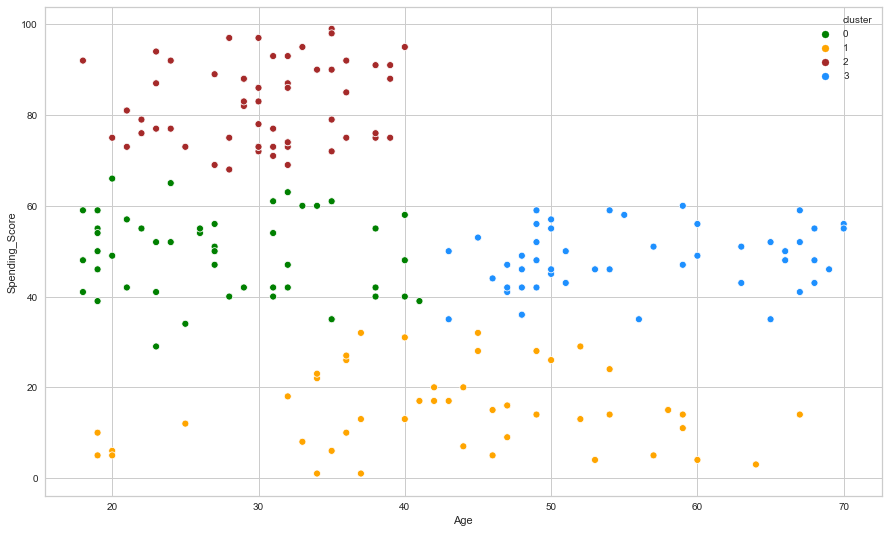

In [33]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [34]:
x2 = df.iloc[: , [2,3]]
x2.head()

Annual_Income  Spending_Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40

In [35]:
from pyclustertend import hopkins
hopkins(x2,x2.shape[0])

0.28185982521872893

#### *ii. Determine optimal number of clusters*

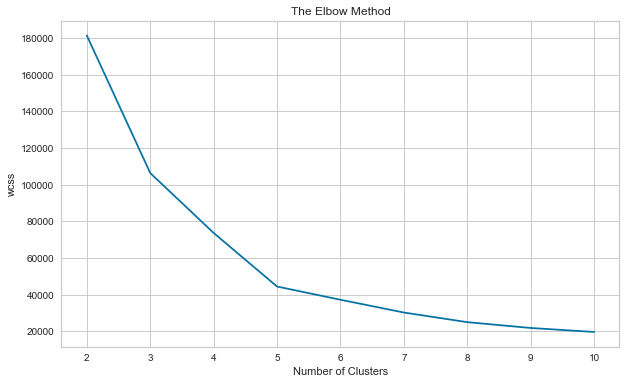

In [36]:
from sklearn.cluster import KMeans
wcss =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

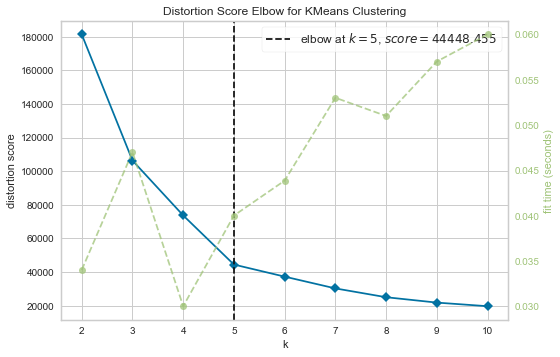

In [37]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,11))
visu.fit(x2)
visu.poof();

#### *iii. Apply K Means*

In [38]:
kmeansmodel=KMeans(n_clusters = 5)
kmeansmodel.fit_predict(x2) 

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2,
       1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0,
       2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [39]:
y_means2 = kmeansmodel.fit_predict(x2)

In [40]:
x2["cluster"] = y_means2
x2

Annual_Income  Spending_Score  cluster
0               15              39        1
1               15              81        3
2               16               6        1
3               16              77        3
4               17              40        1
..             ...             ...      ...
195            120              79        4
196            126              28        2
197            126              74        4
198            137              18        2
199            137              83        4

[200 rows x 3 columns]

#### *iv. Visualizing and Labeling All the Clusters*

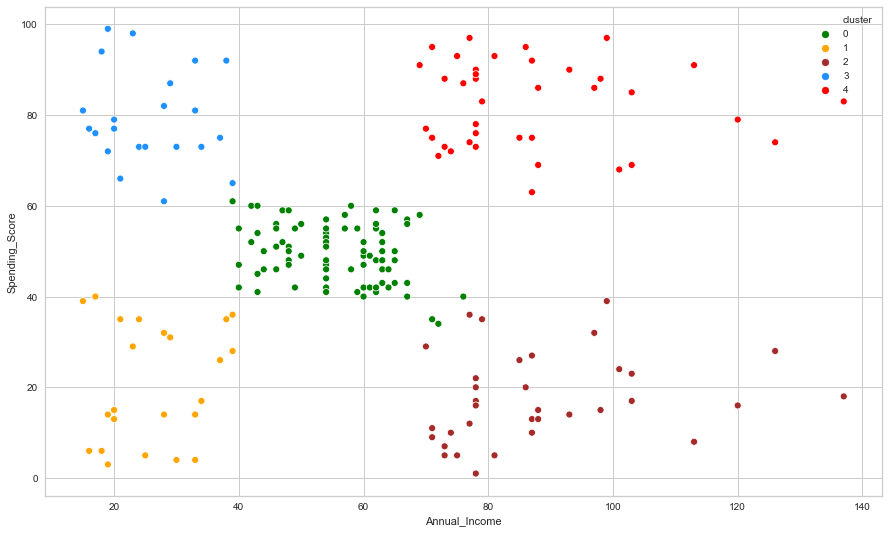

In [41]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=x2,palette=['green','orange','brown','dodgerblue','red'], legend='full')

##### age annual_income and spending_score visulization

In [42]:
df3=df[['Age', 'Annual_Income', 'Spending_Score']]
df3.head()

Age  Annual_Income  Spending_Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40

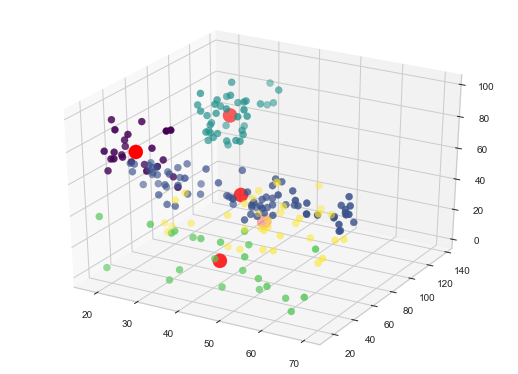

In [43]:
from mpl_toolkits.mplot3d import Axes3D
kmeans= KMeans(n_clusters=5).fit(df3)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df3.iloc[:,0],df3.iloc[:,1],df3.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="o",s = 200);

##### other visualization 3D and dynamic

In [44]:
#!pip install plotly

In [45]:
import plotly.graph_objs as go
import plotly as py

In [46]:
py.offline.init_notebook_mode(connected = True)
df3['cluster_id'] =  y_means2
trace1 = go.Scatter3d(
    x = df3['Age'],
    y = df3['Spending_Score'],
    z = df3['Annual_Income'],
    mode ='markers',
    marker = dict(color = df3['cluster_id'], size = 10, line = dict(color= df3['cluster_id'], width= 8), opacity = 0.8))
data = [trace1]
layout = go.Layout(title= 'Customers\' Segmentation', scene = dict(xaxis = dict(title  = 'Age'),
                                                   yaxis = dict(title  = 'Spending Score (1-100)'),
                                                   zaxis = dict(title  = 'Annual Income (k$)')))
fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show();

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

In [47]:
from scipy.cluster.hierarchy import linkage

#### dendrogram for x1

In [48]:
hc_complete = linkage(x1, "complete")
hc_ward = linkage(x1, "ward")

In [49]:
from scipy.cluster.hierarchy import dendrogram

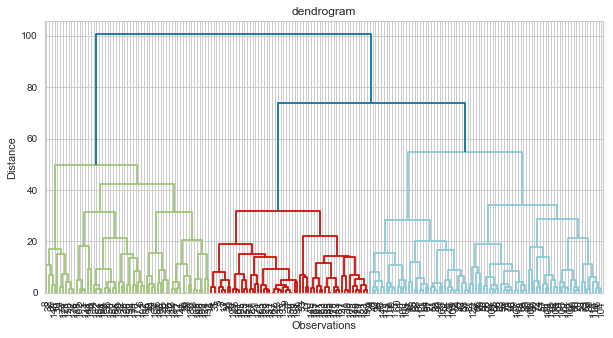

In [50]:
plt.figure(figsize=(10,5))
plt.title("dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10);

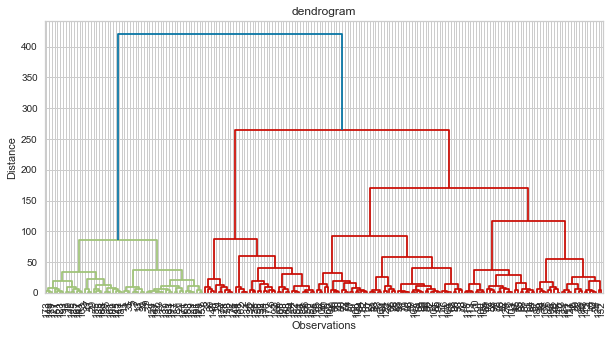

In [51]:
plt.figure(figsize=(10,5))
plt.title("dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10);

#### dendrogram for x2

In [52]:
hc_complete2 = linkage(x2, "complete")
hc_ward2 = linkage(x2, "ward")

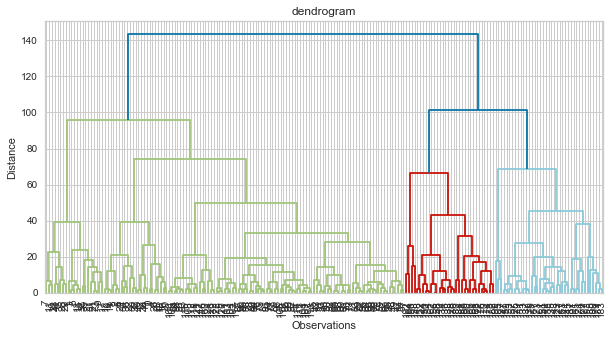

In [53]:
plt.figure(figsize=(10,5))
plt.title("dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete2, leaf_font_size=10);

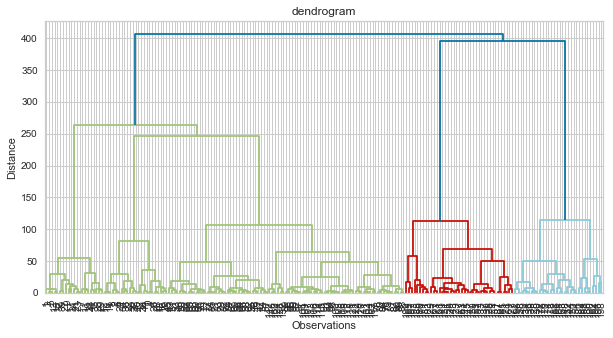

In [54]:
plt.figure(figsize=(10,5))
plt.title("dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward2, leaf_font_size=10);

#### ii. *Apply Agglomerative Clustering*

In [55]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg = cluster.fit_predict(x1)

In [56]:
x1['cluster2'] = y_agg

In [57]:
x1

Age  Spending_Score  cluster  cluster2
0     19              39        0         0
1     21              81        2         3
2     20               6        1         2
3     23              77        2         3
4     31              40        0         0
..   ...             ...      ...       ...
195   35              79        2         3
196   45              28        1         0
197   32              74        2         3
198   32              18        1         2
199   30              83        2         3

[200 rows x 4 columns]

In [58]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = cluster.fit_predict(x2)

In [59]:
x2['cluster2'] = y_agg2

In [60]:
x2

Annual_Income  Spending_Score  cluster  cluster2
0               15              39        1         4
1               15              81        3         3
2               16               6        1         4
3               16              77        3         3
4               17              40        1         4
..             ...             ...      ...       ...
195            120              79        4         2
196            126              28        2         0
197            126              74        4         2
198            137              18        2         0
199            137              83        4         2

[200 rows x 4 columns]

#### iii. *Visualizing and Labeling All the Clusters* 

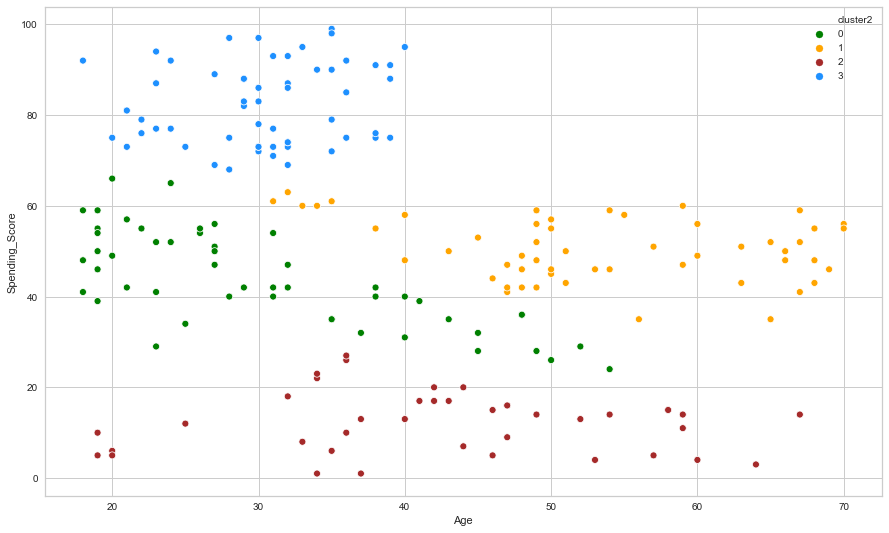

In [61]:
plt.figure(figsize=(15,9))
g=sns.scatterplot(x='Age', y='Spending_Score', hue='cluster2', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

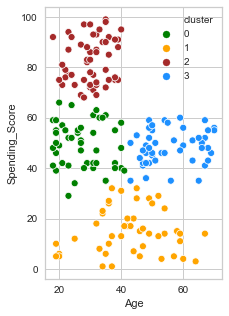

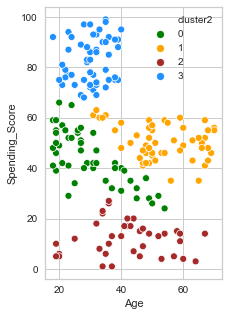

In [69]:
plt.subplot(1,2,1)
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')
plt.show()
plt.subplot(1,2,2)
g=sns.scatterplot(x='Age', y='Spending_Score', hue='cluster2', data=x1,palette=['green','orange','brown','dodgerblue'], legend='full')

In [62]:
#pip install --upgrade nbformat

### Conclusion

The brown group (4th group) has high income and low spending score. That means they can be encouraged to spend more. As a result they are the potential target customers of this dataset. They should be the target of any kind of campaign to make them increase their spending scores.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___